In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

## Feature description
```
age: age in years
sex: sex (1 = male; 0 = female)
cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
trestbps: resting blood pressure (in mm Hg on admission to the hospital)
chol: serum cholestoral in mg/dl
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest
slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
ca: number of major vessels (0-3) colored by flourosopy
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
and the label
condition: 0 = no disease, 1 = disease
```

In [ ]:
data = pd.read_csv('../data/heart_cleveland_upload.csv')
data.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   
5   64    1   0       170   227    0        2      155      0      0.6      1   
6   63    1   0       145   233    1        2      150      0      2.3      2   
7   61    1   0       134   234    0        0      145      0      2.6      1   
8   60    0   0       150   240    0        0      171      0      0.9      0   
9   59    1   0       178   270    0        2      145      0      4.2      2   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
5   0     2          0  
6   0     1          0  
7   2     0          1  
8   0     0          0  
9   0     2          0

In [ ]:
data.describe()

age         sex          cp    trestbps        chol         fbs  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean    54.542088    0.676768    2.158249  131.693603  247.350168    0.144781   
std      9.049736    0.468500    0.964859   17.762806   51.997583    0.352474   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    2.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    2.000000  130.000000  243.000000    0.000000   
75%     61.000000    1.000000    3.000000  140.000000  276.000000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000   
mean     0.996633  149.599327    0.326599    1.055556    0.602694    0.676768   
std      0.994914   22.941562    0.469761    1.166123    0.618187    0.938965   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    0.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    1.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    3.000000   

             thal   condition  
count  297.000000  297.000000  
mean     0.835017    0.461279  
std      0.956690    0.499340  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      2.000000    1.000000  
max      2.000000    1.000000

In [ ]:
data.isnull().values.any()

False

In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'] 

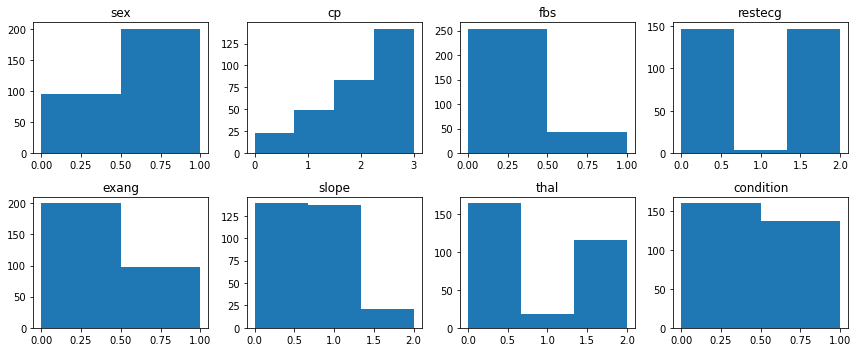

In [ ]:
bins = [2, 4, 2, 3, 2, 3, 3, 2]
features = categorical_features.copy()
features.append('condition')
f, a = plt.subplots(figsize=(12, 5), nrows=2, ncols=4, sharey=False)
a = a.ravel()
for idx, ax in enumerate(a):
    if (idx >= len(features)):
        break;
    ax.hist(data[features[idx]], bins=bins[idx])
    ax.set_title(features[idx])
plt.tight_layout()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


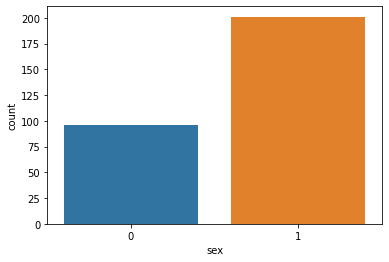

In [ ]:
sns.countplot(x='sex', data=data);

<AxesSubplot:>

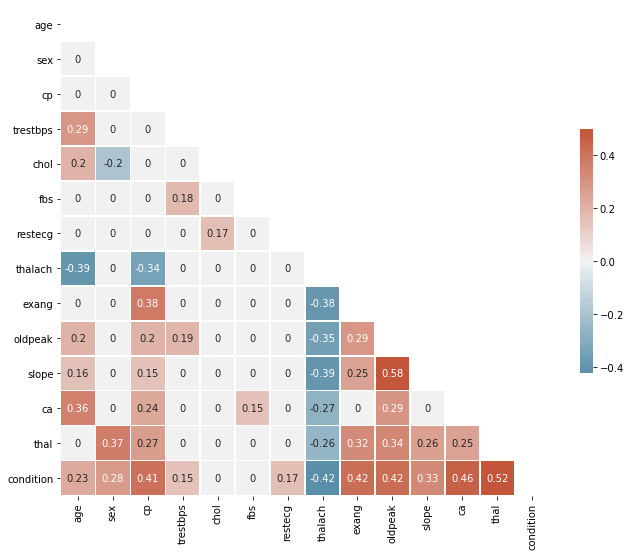

In [ ]:
# Compute the correlation matrix
corr = data.corr()
corr[np.abs(corr) < 0.15] = 0

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

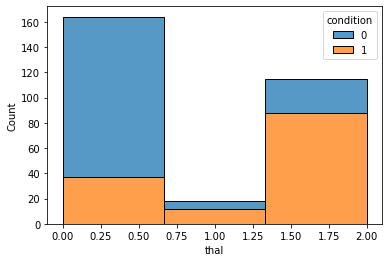

In [ ]:
sns.histplot(data=data, x='thal', hue='condition', multiple="stack", bins=3)
plt.show()

In [ ]:
sns.histplot(data=data, x='oldpeak', hue='condition', multiple="stack")
plt.show()

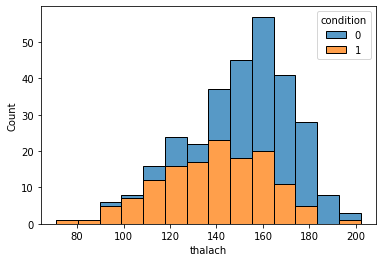

In [ ]:
sns.histplot(data=data, x='thalach', hue='condition', multiple="stack")
plt.show()

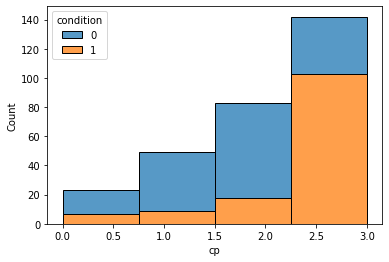

In [ ]:
sns.histplot(data=data, x='cp', hue='condition', multiple="stack", bins=4)
plt.show()

In [ ]:
sns.jointplot(data=data, x="chol", y="oldpeak", hue="condition")

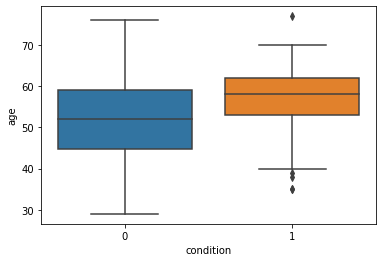

In [ ]:
ax = sns.boxplot(x="condition", y="age", data=data)

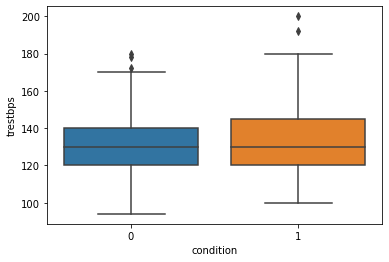

In [ ]:
ax = sns.boxplot(x="condition", y="trestbps", data=data)

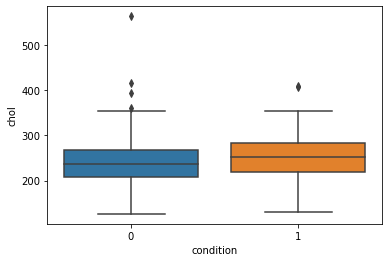

In [ ]:
ax = sns.boxplot(x="condition", y="chol", data=data)

In [ ]:
data.loc[data['chol'] > 350, 'chol'] = data['chol'].median()

In [ ]:
ax = sns.boxplot(x="condition", y="chol", data=data)

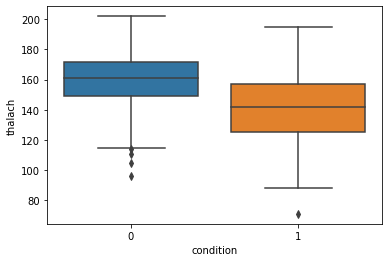

In [ ]:
ax = sns.boxplot(x="condition", y="thalach", data=data)

In [ ]:
ax = sns.boxplot(x="condition", y="ca", data=data)

In [ ]:
num_features = data.drop(columns=features).columns
num_features

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca'], dtype='object')

In [ ]:
cat_data = data[features]
num_data = data.drop(columns=categorical_features)

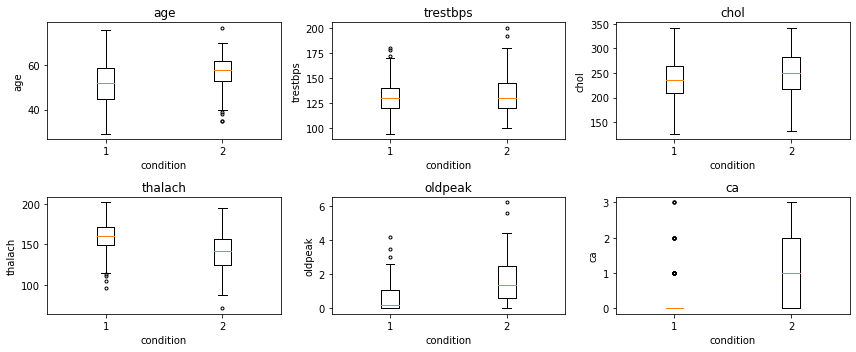

In [ ]:
f, a = plt.subplots(figsize=(12, 5), nrows=2, ncols=3, sharey=False)
a = a.ravel()
for idx, ax in enumerate(a):
    feature = num_features[idx]
    data1 = data[feature][data['condition'] == 0]
    data2 = data[feature][data['condition'] == 1]
    ax.boxplot([data1, data2], 0, '.')
    ax.set_ylabel(feature)
    ax.set_xlabel('condition')
    ax.set_title(feature)
plt.tight_layout()

Из данного графика видно, что выбросов в данных не очень много и можно обучаться.

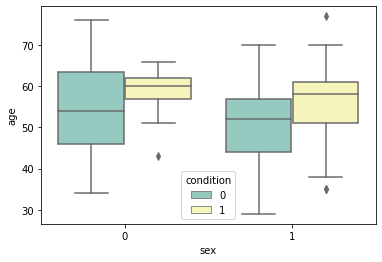

In [ ]:
ax = sns.boxplot(x="sex", y="age", hue="condition",                  
                 data=data, palette="Set3")

Из данного графика видно, что медианный возраст у больных независимо от пола выше, чем у здоровых.

In [ ]:
num_data1 = num_data.drop(columns=['thalach', 'oldpeak', 'ca'])
num_data2 = num_data.drop(columns=['age', 'trestbps', 'chol'])

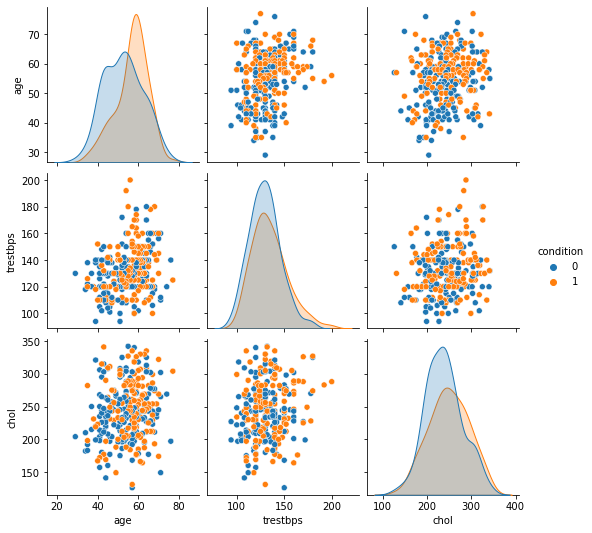

In [ ]:
sns.pairplot(data=num_data1, hue="condition")
plt.show()

In [ ]:
sns.pairplot(data=num_data2, hue="condition")
plt.show()

In [ ]:
data = pd.get_dummies(data, columns=categorical_features, prefix=categorical_features)

In [ ]:
data.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'condition',
       'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1',
       'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0',
       'slope_1', 'slope_2', 'thal_0', 'thal_1', 'thal_2'],
      dtype='object')

In [ ]:
y = data['condition'].values
data = data.drop(columns=['condition'])
X = data.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=10, svd_solver='randomized', random_state=123)
X_train = pca.fit_transform(X_train)
X_val = pca.transform(X_val)
X_test = pca.transform(X_test)

In [ ]:
pca.explained_variance_ratio_

array([0.19113343, 0.10022055, 0.09704772, 0.07458286, 0.0646275 ,
       0.05409436, 0.05256305, 0.05118073, 0.04538307, 0.04220566])

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.19113343, 0.29135398, 0.38840171, 0.46298457, 0.52761207,
       0.58170643, 0.63426948, 0.6854502 , 0.73083327, 0.77303893])

In [ ]:
data.head()

age  trestbps  chol  thalach  oldpeak  ca  sex_0  sex_1  cp_0  cp_1  ...  \
0   69       160   234      131      0.1   1      0      1     1     0  ...   
1   69       140   239      151      1.8   2      1      0     1     0  ...   
2   66       150   226      114      2.6   0      1      0     1     0  ...   
3   65       138   282      174      1.4   1      0      1     1     0  ...   
4   64       110   211      144      1.8   0      0      1     1     0  ...   

   restecg_1  restecg_2  exang_0  exang_1  slope_0  slope_1  slope_2  thal_0  \
0          0          1        1        0        0        1        0       1   
1          0          0        1        0        1        0        0       1   
2          0          0        1        0        0        0        1       1   
3          0          1        1        0        0        1        0       1   
4          0          1        0        1        0        1        0       1   

   thal_1  thal_2  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 25 columns]

## LogisticRegression

In [ ]:
clf = LogisticRegression(random_state=0, penalty='l2', C=0.9).fit(X_train, y_train)
clf.predict(X_val)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1])

In [ ]:
clf.score(X_val, y_val)

0.8888888888888888

In [ ]:
clf.score(X_test, y_test) 

0.8666666666666667

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])

0.9166666666666667

In [ ]:
from sklearn import metrics

In [ ]:
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

print("Accuracy", metrics.accuracy_score(y_val, y_pred))
y_pred_proba = clf.predict_proba(X_val)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_val,  y_pred_proba)
auc = metrics.roc_auc_score(y_val, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Accuracy 0.8888888888888888


In [ ]:
X_full = scaler.transform(X)
X_full = pca.transform(X_full)

Accuracy 0.835016835016835


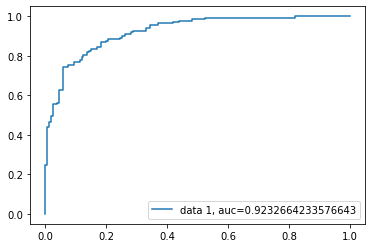

In [ ]:
clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_full)

print("Accuracy", metrics.accuracy_score(y, y_pred))
y_pred_proba = clf.predict_proba(X_full)[::,1]
fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
auc = metrics.roc_auc_score(y, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=9)

In [ ]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
neigh.predict(X_val)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1])

In [ ]:
neigh.score(X_val, y_val)

0.8518518518518519

In [ ]:
neigh.score(X_test, y_test)

0.8

In [ ]:
roc_auc_score(y_val, neigh.predict_proba(X_val)[:, 1])

0.9444444444444444

## DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
clf.score(X_val, y_val)

0.8148148148148148

In [ ]:
clf.score(X_test, y_test)

0.8

In [ ]:
roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])

0.8083333333333333

## GaussianNaiveBayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [ ]:
clf.score(X_val, y_val)

0.8888888888888888

In [ ]:
clf.score(X_test, y_test)

0.8

In [ ]:
roc_auc_score(y_val, clf.predict_proba(X_val)[:, 1])

0.9222222222222223

## Support Vector Machines

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
clf.score(X_val, y_val)

0.8888888888888888

In [ ]:
clf.score(X_test, y_test)

0.8333333333333334